# 3 - Plot

## Load all results data and compute mean & std

In [24]:
import numpy as np
import os

PROJ_DIR = os.path.realpath(os.path.dirname(os.path.abspath('')))

DATASET = 'glass'
MODEL_NAME = '_untrained'

keys = ['correct_pairings_inv', 'correct_pairings_basX', 'spearman_inv', 'spearman_basX', 'aucs_inv', 'aucs_basX', 'spearman_exceptional_inv', 'spearman_exceptional_basX']

result_dict = {}

for f in os.listdir(os.path.join(PROJ_DIR, 'results')):
    if f.startswith(DATASET) and f.endswith(f'{MODEL_NAME}_results.npz'):
        FILENAME = os.path.join(PROJ_DIR, 'results', f)
        with np.load(FILENAME) as data:
            for k in keys:
                d = np.expand_dims(data[k], axis=0)
                if k in result_dict:
                    result_dict[k] = np.vstack((result_dict[k], d))
                else:
                    result_dict[k] = d
        FILENAME = FILENAME.replace('_results', '_measures')
        with np.load(FILENAME) as data:
            activation = data['output_curves'][0][-1]
            k = 'activation'
            if k in result_dict:
                result_dict[k] = np.vstack((result_dict[k], activation))
            else:
                result_dict[k] = activation

for k in keys:
    result_dict[f'{k}_mean'] = np.nanmean(result_dict[k], axis=0)
    result_dict[f'{k}_std'] = np.nanstd(result_dict[k], axis=0)

# DEBUG
#print(result_dict['spearman_inv'])
#print(result_dict['spearman_inv_mean'])
#print(result_dict['spearman_basX'])
#print(result_dict['spearman_basX_mean'])

KeyError: 'correct_pairings_inv'

In [25]:
FILENAME = os.path.join(PROJ_DIR, 'results', f)
with np.load(FILENAME) as data:
    print(np.mean(data['output_curves']))

0.5151964


## Plot correct pairings

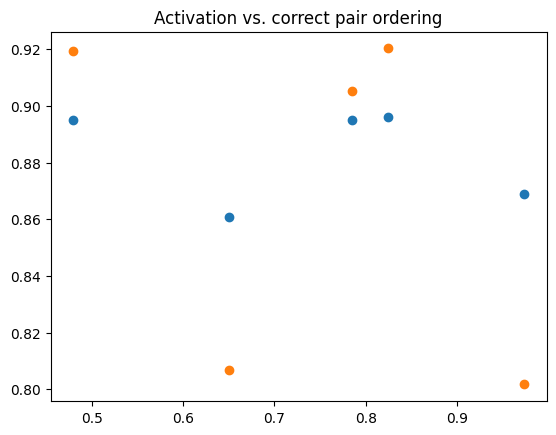

In [6]:
import matplotlib.pyplot as plt

plt.scatter(result_dict['activation'],result_dict['correct_pairings_basX'][:,7])
plt.scatter(result_dict['activation'],result_dict['correct_pairings_inv'])
plt.title('Activation vs. correct pair ordering')
plt.show()

## Plot Spearman correlation

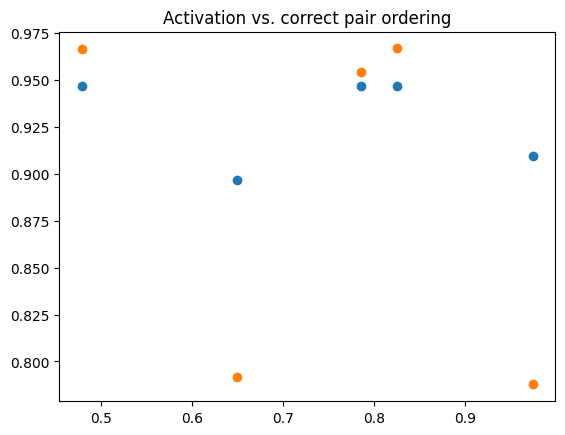

In [7]:
import matplotlib.pyplot as plt

plt.scatter(result_dict['activation'],result_dict['spearman_basX'][:,7])
plt.scatter(result_dict['activation'],result_dict['spearman_inv'])
plt.title('Activation vs. correct pair ordering')
plt.show()

## Plot ability to detect exceptional rankings

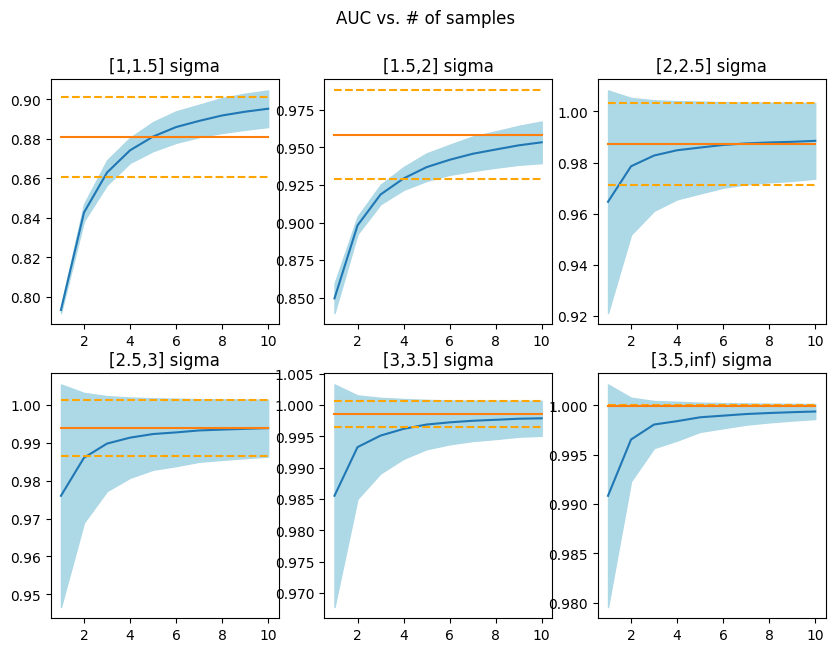

In [11]:
boundaries = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    ax.fill_between(range(1,11), result_dict['aucs_basX_mean'][:,i+1]+result_dict['aucs_basX_std'][:,i+1], result_dict['aucs_basX_mean'][:,i+1]-result_dict['aucs_basX_std'][:,i+1], color='lightblue')
    ax.plot(range(1,11),result_dict['aucs_basX_mean'][:,i+1])
    if i<len(boundaries)-2:
        ax.set_title(f'[{boundaries[i+1]},{boundaries[i+1+1]}] sigma')
    else:
        ax.set_title(f'[{boundaries[i+1]},inf) sigma')
    ax.plot([1,10], [result_dict['aucs_inv_mean'][i+1]+result_dict['aucs_inv_std'][i+1], result_dict['aucs_inv_mean'][i+1]+result_dict['aucs_inv_std'][i+1]], color='orange', linestyle = 'dashed')
    ax.plot([1,10], [result_dict['aucs_inv_mean'][i+1]-result_dict['aucs_inv_std'][i+1], result_dict['aucs_inv_mean'][i+1]-result_dict['aucs_inv_std'][i+1]], color='orange', linestyle = 'dashed')
    ax.plot([1,10],[result_dict['aucs_inv_mean'][i+1],result_dict['aucs_inv_mean'][i+1]])
plt.suptitle('AUC vs. # of samples')
plt.savefig(os.path.join(PROJ_DIR, 'results', 'plots', f'{DATASET}_{MODEL_NAME}_auc_exceptional.png'))
plt.show()
plt.close(fig)

## Plot Spearman correlation for exceptional rankings

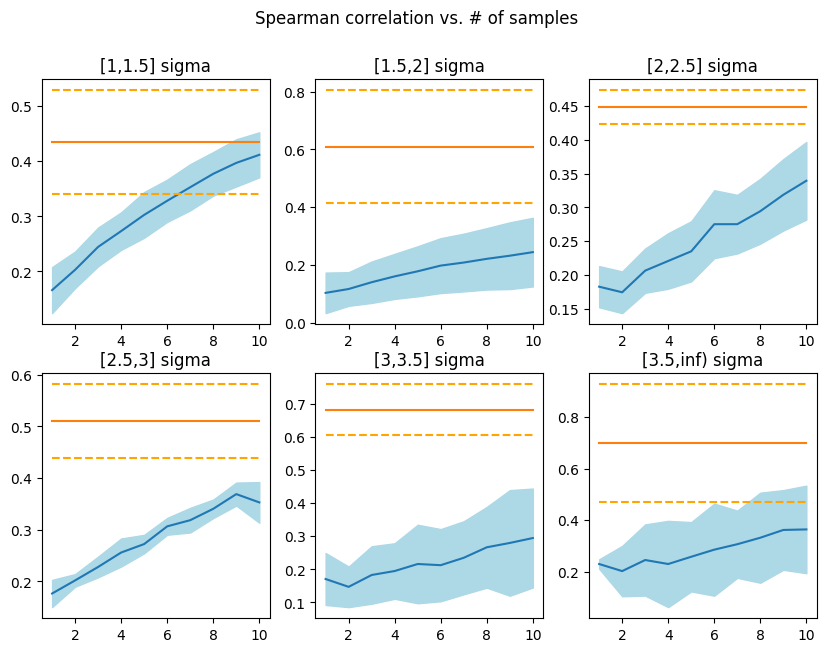

In [12]:
boundaries = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    ax.fill_between(range(1,11), result_dict['spearman_exceptional_basX_mean'][:,i+1]+result_dict['spearman_exceptional_basX_std'][:,i+1], result_dict['spearman_exceptional_basX_mean'][:,i+1]-result_dict['spearman_exceptional_basX_std'][:,i+1], color='lightblue')
    ax.plot(range(1,11),result_dict['spearman_exceptional_basX_mean'][:,i+1])
    if i<len(boundaries)-2:
        ax.set_title(f'[{boundaries[i+1]},{boundaries[i+1+1]}] sigma')
    else:
        ax.set_title(f'[{boundaries[i+1]},inf) sigma')
    ax.plot([1,10], [result_dict['spearman_exceptional_inv_mean'][i+1]+result_dict['spearman_exceptional_inv_std'][i+1], result_dict['spearman_exceptional_inv_mean'][i+1]+result_dict['spearman_exceptional_inv_std'][i+1]], color='orange', linestyle = 'dashed')
    ax.plot([1,10], [result_dict['spearman_exceptional_inv_mean'][i+1]-result_dict['spearman_exceptional_inv_std'][i+1], result_dict['spearman_exceptional_inv_mean'][i+1]-result_dict['spearman_exceptional_inv_std'][i+1]], color='orange', linestyle = 'dashed')
    ax.plot([1,10],[result_dict['spearman_exceptional_inv_mean'][i+1],result_dict['spearman_exceptional_inv_mean'][i+1]])
plt.suptitle('Spearman correlation vs. # of samples')
plt.savefig(os.path.join(PROJ_DIR, 'results', 'plots', f'{DATASET}_{MODEL_NAME}_spearman_exceptional.png'))
plt.show()